# Определение перспективного тарифа для телеком компании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-анализа-и-исходные-данные" data-toc-modified-id="Цель-анализа-и-исходные-данные-1">Цель анализа и исходные данные</a></span></li><li><span><a href="#Шаг-1.-Изучение-общей-информации-по-данным-" data-toc-modified-id="Шаг-1.-Изучение-общей-информации-по-данным--2">Шаг 1. Изучение общей информации по данным <a id="some_id"></a></a></span></li><li><span><a href="#Шаг-2.-Подготовка-данных-" data-toc-modified-id="Шаг-2.-Подготовка-данных--3">Шаг 2. Подготовка данных <a id="some_id"></a></a></span></li><li><span><a href="#Шаг-3.-Анализ-данных-" data-toc-modified-id="Шаг-3.-Анализ-данных--4">Шаг 3. Анализ данных <a id="some_id"></a></a></span><ul class="toc-item"><li><span><a href="#Статистика-по-тарифу-&quot;Ультра&quot;" data-toc-modified-id="Статистика-по-тарифу-&quot;Ультра&quot;-4.1">Статистика по тарифу "Ультра"</a></span></li><li><span><a href="#Статистика-по-тарифу-&quot;Смарт&quot;" data-toc-modified-id="Статистика-по-тарифу-&quot;Смарт&quot;-4.2">Статистика по тарифу "Смарт"</a></span></li><li><span><a href="#Сравнение-тарифов-по-месяцам" data-toc-modified-id="Сравнение-тарифов-по-месяцам-4.3">Сравнение тарифов по месяцам</a></span></li><li><span><a href="#Сравнение-выручки-тарифов" data-toc-modified-id="Сравнение-выручки-тарифов-4.4">Сравнение выручки тарифов</a></span></li></ul></li><li><span><a href="#Шаг-4.-Проверка-гипотез-" data-toc-modified-id="Шаг-4.-Проверка-гипотез--5">Шаг 4. Проверка гипотез <a id="some_id"></a></a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№1" data-toc-modified-id="Гипотеза-№1-5.1">Гипотеза №1</a></span></li><li><span><a href="#Гипотеза-№2" data-toc-modified-id="Гипотеза-№2-5.2">Гипотеза №2</a></span></li></ul></li><li><span><a href="#Шаг-5.-Общий-вывод-" data-toc-modified-id="Шаг-5.-Общий-вывод--6">Шаг 5. Общий вывод <a id="some_id"></a></a></span></li></ul></div>

### Цель анализа и исходные данные

«Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, нужно понять, какой тариф приносит больше денег.
В проекте представлен предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализировать поведение клиентов и выбран лучший тариф.

Описание данных:


Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в - месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

### Шаг 1. Изучение общей информации по данным <a id="some_id"></a>

In [ ]:
import pandas as pd
import numpy as np 
import calendar
import matplotlib.pyplot as plt 
from scipy import stats as st
from scipy.stats import levene

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
calls.info()
print()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB



,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Данные в таблицы **calls** не имеют пропусков.
Необходимо изменить тип данных в столбце *call_date*. А также округлить вверх *duration* и изменить на целочисленный тип.

In [3]:
# Информация об интернет-сессиях

internet = pd.read_csv('/datasets/internet.csv', index_col=0)
internet.info()
print()
internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB



,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Данные в таблицы **internet** не имеют пропусков. Необходимо изменить тип данных в столбце *session_date*. А также округлить вверх *mb_used* и изменить на целочисленный тип.

In [4]:
# Информация о сообщениях

messages = pd.read_csv('/datasets/messages.csv')
messages.info()
print()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB



,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Данные в таблицы **messages** не имеют пропусков. Необходимо изменить тип данных в столбце *message_date*.

In [5]:
# Информация о тарифах

tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()
print()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes



,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Таблица **tariffs** содержит всего 2 строки - информации о 2х тарифах, соответственно. Типы данных соответствуют.

In [6]:
# Информация о пользователях

users = pd.read_csv('/datasets/users.csv')
users.info()
print()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Необходимо изменить тип данных в столбце *reg_date* и *churn_date* на дату.

**Вывод по исходным данным: необходимо поменять типы в столбцаз на дату и целочисленный, там где это нужно. А также проверить на наличие дубликатов.**

### Шаг 2. Подготовка данных <a id="some_id"></a>

In [7]:
# Замена типов и удаление дубликатов в таблице users
users['reg_date'] = pd.to_datetime(
    users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(
    users['churn_date'], format='%Y-%m-%d')
users.info()

# Строки в таблице имеют уникальный id, поэтому напишем условие, исключающее попадание в анализ дубликатов
users = users.drop_duplicates().reset_index(drop=True)
# На данный момент дубликатов нет

# Сразу объединим данные пользователя с информацией о его тарифном плане
tariffs.rename(columns = {'tariff_name':'tariff'}, inplace = True)
print()
users = users[['user_id', 'tariff', 'city', 'reg_date', 'churn_date']].merge(tariffs, on='tariff', how='left')
users_ultra = users[users['tariff']=='ultra']['user_id'].count()
users_smart = users[users['tariff']=='smart']['user_id'].count()
print('Количество пользователей тарифа Ультра -', users_ultra)
print('Количество пользователей тарифа Смарт -', users_smart)
users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

Количество пользователей тарифа Ультра - 149
Количество пользователей тарифа Смарт - 351


,user_id,tariff,city,reg_date,churn_date,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,Краснодар,2018-05-25,NaT,1000,30720,3000,1950,150,1,1
1,1001,smart,Москва,2018-11-01,NaT,50,15360,500,550,200,3,3
2,1002,smart,Стерлитамак,2018-06-17,NaT,50,15360,500,550,200,3,3
3,1003,ultra,Москва,2018-08-17,NaT,1000,30720,3000,1950,150,1,1
4,1004,ultra,Новокузнецк,2018-05-14,NaT,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1495,ultra,Иркутск,2018-08-28,NaT,1000,30720,3000,1950,150,1,1
496,1496,smart,Вологда,2018-01-27,NaT,50,15360,500,550,200,3,3
497,1497,smart,Челябинск,2018-10-09,NaT,50,15360,500,550,200,3,3
498,1498,smart,Владикавказ,2018-07-19,2018-10-25,50,15360,500,550,200,3,3


* Получили таблицу со сводной информацие о пользователе и его тарифном плане. Всего 500 пользователей. Из них большая доля приходится на тариф Смарт - 351, на Ультра всего 149.

**Параллельно с необходимыми изменениями сгруппируем данные  по месяцам, так как тарифные планы имеют помесячную тарификацию:**

In [8]:
# Замена типов и удаление дубликатов в таблице calls
calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d')

calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.info()
print()

# Проверка возможных пропущенных звонков
print('Количество пропущенных звонков ', calls[calls['duration'] == 0]['id'].count())
print() 

# Удаление пропущенных значений
calls = calls[calls['duration'] > 0]

# Строки в таблице имеют уникальный id, поэтому напишем условие, исключающее попадание в анализ дубликатов
calls = calls.drop_duplicates().reset_index(drop=True)
# На данный момент дубликатов нет

# Дополнительные столбцы для группировки
calls['month'] = pd.DatetimeIndex(calls['call_date']).month 
# Проведем группировку 
calls_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'] )
calls_month.columns = ['Sum_dur', 'Count_dur']
calls_month


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB

Количество пропущенных звонков  39613



Sum_dur  Count_dur
user_id month                    
1000    5          159         17
        6          172         28
        7          340         41
        8          408         42
        9          466         46
...                ...        ...
1498    10         247         30
1499    9           70          8
        10         449         44
        11         612         62
        12         492         56

[3168 rows x 2 columns]

* *Выявленно 39613 нулевых значений минут, это могут быть пропущенные вызовы. На сравнение длительности вызовов с тарифным планом это не повлияет, может повлиять на количество вызовов. Поэтому мы их удалили.*

In [9]:
# Замена типов и удаление дубликатов в таблице internet
internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d')

internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')
internet.info()

# Строки в таблице имеют уникальный id, поэтому напишем условие, исключающее попадание в анализ дубликатов
internet = internet.drop_duplicates().reset_index(drop=True)
# На данный момент дубликатов нет

# Дополнительные столбцы для группировки
internet['month'] = pd.DatetimeIndex(internet['session_date']).month 

# Проведем группировку 
internet_month = internet.groupby(['user_id', 'month'])[['mb_used']].sum()
internet_month

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB


mb_used
user_id month         
1000    5         2256
        6        23257
        7        14016
        8        14070
        9        14581
...                ...
1498    10       20604
1499    9         1848
        10       17809
        11       17984
        12       13077

[3203 rows x 1 columns]

In [10]:
# Замена типов и удаление дубликатов в таблице messages
messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d')
messages.info()

# Строки в таблице имеют уникальный id, поэтому напишем условие, исключающее попадание в анализ дубликатов
messages = messages.drop_duplicates().reset_index(drop=True)
# На данный момент дубликатов нет

# Дополнительные столбцы для группировки
messages['month'] = pd.DatetimeIndex(messages['message_date']).month 

# Проведем группировку 
messages_month = messages.groupby(['user_id', 'month'])[['id']].count()
messages_month.columns = ['messages']
messages_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

*Теперь типы данных соответствуют значениям, а количество строк, ввиду группировки, уже не такое большое. Далее нужно объединить все использованные услуги пользователя в одну таблицу*

In [11]:
# Объединение таблиц в одну сводную

traffic = internet_month.join(calls_month, how='outer')
traffic = traffic.join(messages_month, how='outer')
traffic = traffic.join(users.set_index('user_id'), on='user_id')

# После объединения таблиц, появились пустые строки, заполним их нулем и снова поменяем тип
traffic['mb_used'] = traffic['mb_used'].fillna(0).astype('int')
traffic['Sum_dur'] = traffic['Sum_dur'].fillna(0).astype('int')
traffic['Count_dur'] = traffic['Count_dur'].fillna(0).astype('int')
traffic['messages'] = traffic['messages'].fillna(0).astype('int')

traffic

mb_used  Sum_dur  Count_dur  messages tariff         city  \
user_id month                                                              
1000    5         2256      159         17        22  ultra    Краснодар   
        6        23257      172         28        60  ultra    Краснодар   
        7        14016      340         41        75  ultra    Краснодар   
        8        14070      408         42        81  ultra    Краснодар   
        9        14581      466         46        57  ultra    Краснодар   
...                ...      ...        ...       ...    ...          ...   
1498    10       20604      247         30        42  smart  Владикавказ   
1499    9         1848       70          8        11  smart        Пермь   
        10       17809      449         44        48  smart        Пермь   
        11       17984      612         62        59  smart        Пермь   
        12       13077      492         56        66  smart        Пермь   

                reg_date churn_date  messages_included  mb_per_month_included  \
user_id month                                                                   
1000    5     2018-05-25        NaT               1000                  30720   
        6     2018-05-25        NaT               1000                  30720   
        7     2018-05-25        NaT               1000                  30720   
        8     2018-05-25        NaT               1000                  30720   
        9     2018-05-25        NaT               1000                  30720   
...                  ...        ...                ...                    ...   
1498    10    2018-07-19 2018-10-25                 50                  15360   
1499    9     2018-09-27        NaT                 50                  15360   
        10    2018-09-27        NaT                 50                  15360   
        11    2018-09-27        NaT                 50                  15360   
        12    2018-09-27        NaT                 50                  15360   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5                  3000             1950         150                1   
        6                  3000             1950         150                1   
        7                  3000             1950         150                1   
        8                  3000             1950         150                1   
        9                  3000             1950         150                1   
...                         ...              ...         ...              ...   
1498    10                  500              550         200                3   
1499    9                   500              550         200                3   
        10                  500              550         200                3   
        11                  500              550         200                3   
        12                  500              550         200                3   

               rub_per_minute  
user_id month                  
1000    5                   1  
        6                   1  
        7                   1  
        8                   1  
        9                   1  
...                       ...  
1498    10                  3  
1499    9                   3  
        10                  3  
        11                  3  
        12                  3  

[3214 rows x 15 columns]

*Рассчитаем помесячную выручку с каждого пользователя в новом столбце. Учитывать будем абонентскую плату и стоимость превышения пакета услуг.*
Так как нам не предоставлен вариант расчета и списания ежемесячной платы выдвигаем предложение, чтобы списание было у всех пользователей в конце месяца. При этом, если пользователь подключился к тарифу в середине месяца - деньги списываются только за дни подключения. А также, если тариф был отключен в оплаченный период - остаток возвращается.

In [12]:
# Добавляем новый столбец выручки

# Считаем ежем.оплату в зависимости от даты подключения /отключения
def monthly_fee(row):
    month_now = row.name[1]
    delta = 1 # дельта: 1 - весь месяц, часть месяца - кол-во используемых дней/кол-во дней в месяце
    end_day_month = calendar.monthrange(2018, month_now)[1]
    if row['reg_date'].month == month_now:
        # Зависимость от даты подключения
        delta = (end_day_month - row['reg_date'].day + 1) / end_day_month # включая день подключения
    if row['churn_date'].month == month_now:
        # Зависимость от даты отключения
        delta = delta - (end_day_month - row['churn_date'].day + 1) / end_day_month # включая день откключения
    return row['rub_monthly_fee'] * delta

# Расчет дополнительных расходов сверх пакета
def rub_per_package(row, included, used, cost):
    if row[included] < row[used]:
        return (row[used] - row[included]) * row[cost]
    return 0

# Сумма ежем.оплаты и доп расходов
def per_row(row):
    return (monthly_fee(row)+
           rub_per_package(row, 'mb_per_month_included', 'mb_used', 'rub_per_gb')/1024+
           rub_per_package(row, 'minutes_included', 'Sum_dur', 'rub_per_minute')+
           rub_per_package(row, 'messages_included', 'messages', 'rub_per_message'))

traffic['revenue'] = traffic.apply(per_row, axis=1).round(2)
traffic

mb_used  Sum_dur  Count_dur  messages tariff         city  \
user_id month                                                              
1000    5         2256      159         17        22  ultra    Краснодар   
        6        23257      172         28        60  ultra    Краснодар   
        7        14016      340         41        75  ultra    Краснодар   
        8        14070      408         42        81  ultra    Краснодар   
        9        14581      466         46        57  ultra    Краснодар   
...                ...      ...        ...       ...    ...          ...   
1498    10       20604      247         30        42  smart  Владикавказ   
1499    9         1848       70          8        11  smart        Пермь   
        10       17809      449         44        48  smart        Пермь   
        11       17984      612         62        59  smart        Пермь   
        12       13077      492         56        66  smart        Пермь   

                reg_date churn_date  messages_included  mb_per_month_included  \
user_id month                                                                   
1000    5     2018-05-25        NaT               1000                  30720   
        6     2018-05-25        NaT               1000                  30720   
        7     2018-05-25        NaT               1000                  30720   
        8     2018-05-25        NaT               1000                  30720   
        9     2018-05-25        NaT               1000                  30720   
...                  ...        ...                ...                    ...   
1498    10    2018-07-19 2018-10-25                 50                  15360   
1499    9     2018-09-27        NaT                 50                  15360   
        10    2018-09-27        NaT                 50                  15360   
        11    2018-09-27        NaT                 50                  15360   
        12    2018-09-27        NaT                 50                  15360   

               minutes_included  rub_monthly_fee  rub_per_gb  rub_per_message  \
user_id month                                                                   
1000    5                  3000             1950         150                1   
        6                  3000             1950         150                1   
        7                  3000             1950         150                1   
        8                  3000             1950         150                1   
        9                  3000             1950         150                1   
...                         ...              ...         ...              ...   
1498    10                  500              550         200                3   
1499    9                   500              550         200                3   
        10                  500              550         200                3   
        11                  500              550         200                3   
        12                  500              550         200                3   

               rub_per_minute  revenue  
user_id month                           
1000    5                   1   440.32  
        6                   1  1950.00  
        7                   1  1950.00  
        8                   1  1950.00  
        9                   1  1950.00  
...                       ...      ...  
1498    10                  3  1450.03  
1499    9                   3    73.33  
        10                  3  1028.32  
        11                  3  1425.50  
        12                  3   598.00  

[3214 rows x 16 columns]

**В данном разделе, подготовили данные для дальнейшего анализа и сделали сводную таблицу по трафику данных для каждого пользователя в разрезе месяцев. В ходе обработки выяснилось, что пользователей тарифа Смарт несколько больше (351), чем Ультра (149). Это можно объяснить тем, что первый в несколько раз дешевле.**

### Шаг 3. Анализ данных <a id="some_id"></a>

In [13]:
# Создадим срезы по тарифам
tariff_ultra = traffic[traffic['tariff'] == 'ultra']
tariff_smart = traffic[traffic['tariff'] == 'smart']

#### Статистика по тарифу "Ультра"

Сводные данные после исключения выбросов: 

Количество минут в месяц
Среднее 560.96
Медиана 556.0
Количество тех, кто не пользуется пакетом 38 

Количество звонков в месяц
Среднее 59.42
Медиана 59.0
Количество тех, кто не пользуется пакетом 38 

Количество мб в месяц
Среднее 19417.80
Медиана 19055.0
Количество тех, кто не пользуется пакетом 11 

Количество сообщений в месяц
Среднее 62.41
Медиана 53.0
Количество тех, кто не пользуется пакетом 190 



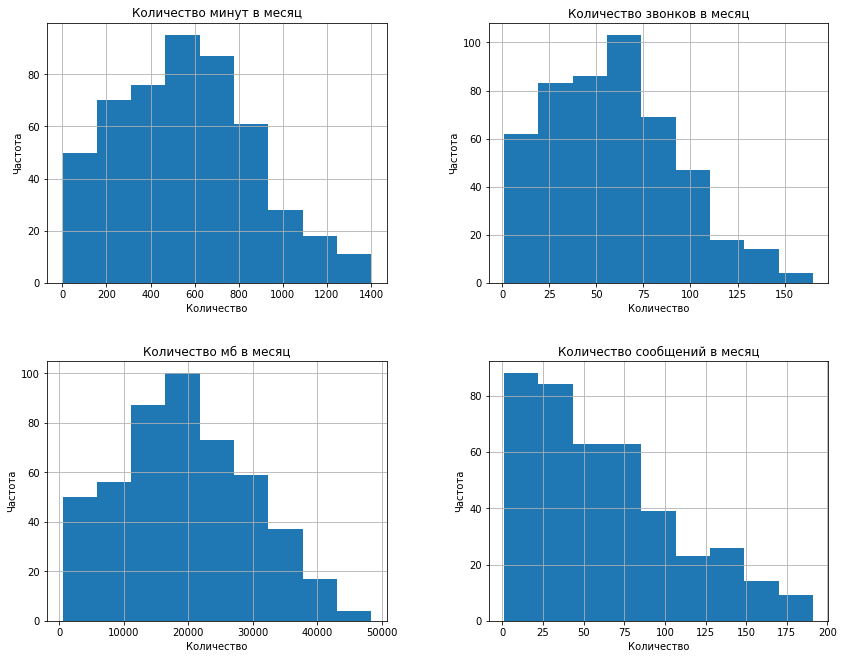

In [14]:
# Анализ количества минут
parameters_ultra =[{'group': 'Sum_dur', 'title': 'Количество минут в месяц', 'xlabel': 'Количество', 'ylabel': 'Частота', 'loc_x': 0,'loc_y': 0}, 
    {'group': 'Count_dur', 'title':'Количество звонков в месяц', 'xlabel': 'Количество', 'ylabel': 'Частота','loc_x': 0,'loc_y': 1}, 
    {'group': 'mb_used', 'title': 'Количество мб в месяц', 'xlabel': 'Количество', 'ylabel': 'Частота','loc_x': 1,'loc_y': 0}, 
    {'group': 'messages', 'title': 'Количество сообщений в месяц', 'xlabel': 'Количество', 'ylabel': 'Частота','loc_x': 1,'loc_y': 1}]

print('Сводные данные после исключения выбросов:', '\n')
fig, axes = plt.subplots(2,2,figsize=(14,11))
for param in parameters_ultra:
    mean_ultra = tariff_ultra[param['group']].mean() # среднее по месяцам
    variance_ultra = np.var(tariff_ultra[param['group']], ddof=1) # дисперсия
    standart_dev_ultra = np.sqrt(variance_ultra) # стандартное отклонение
    # Применим правило 3 сигм, для поиска выбросов 
    avg_ultra = mean_ultra + 3 * standart_dev_ultra #  все, что выше является выбросом
    # Исключаем выбросы и значения равные 0, так как они не интересны для анализа выручки
    tariff_ultra_filtr = tariff_ultra[(tariff_ultra[param['group']] < avg_ultra) & tariff_ultra[param['group']] !=0]
    # Строим гистограмму 
    tariff_ultra_filtr.hist([param['group']], bins=9, ax=axes[param['loc_x'], param['loc_y']])
    axes[param['loc_x'], param['loc_y']].set_title(param['title'])
    axes[param['loc_x'], param['loc_y']].set_xlabel(param['xlabel'])
    axes[param['loc_x'], param['loc_y']].set_ylabel(param['ylabel'])
    # Выведем сводную информацию для каждой из услуг
    print(param['title'])
    print('Среднее {:.2f}'.format(tariff_ultra_filtr[param['group']].mean()))
    print('Медиана', tariff_ultra_filtr[param['group']].median())
    #print('Дисперсия {:.2f}'.format(np.var(tariff_ultra_filtr[param['group']], ddof=1)))
    #print('Стандартное отклонение {:.2f}'.format(np.std(tariff_ultra_filtr[param['group']])))
    print('Количество тех, кто не пользуется пакетом', tariff_ultra[tariff_ultra[param['group']] ==0][param['group']].count(), '\n')
    

1. Графики о количестве звонков и минут повторяют динамику друг друга
2. Судя по медиане и графику "Количество минут" набор данных скошен вправо 
3. Набор данных для "Количество звонков" смещен вправо совсем незначительно
4. Наборы данных для "Количество мб" и "Количество сообщений" также скошены вправо
5. Заметная часть пользователей вообще не пользуются СМС и звонками
6. Важно отметить, что в среднем в месяц пользователи не наговаривают и половины от пакета минут (до 1500 минут из 3000), из пакета СМС в 1000 шт - тратят до 200. И только интернет трафик иногда (около трети данных) превышает тариф в 30Гб(=30720мб). 

**Отсюда можно сделать вывод, что тариф Ультра в основном приностит только Ежемесячную плату (=1950р) + (иногда) доплату за интернет**

#### Статистика по тарифу "Смарт"

Сводные данные после исключения выбросов: 

Количество минут в месяц
Среднее 420.87
Медиана 427.0
Дисперсия 34231.47
Стандартное отклонение 184.94
Количество тех, кто не пользуется пакетом 8 

Количество звонков в месяц
Среднее 47.16
Медиана 47.0
Дисперсия 404.47
Стандартное отклонение 20.10
Количество тех, кто не пользуется пакетом 8 

Количество мб в месяц
Среднее 16167.55
Медиана 16373.0
Дисперсия 32743520.49
Стандартное отклонение 5719.60
Количество тех, кто не пользуется пакетом 2 

Количество сообщений в месяц
Среднее 37.95
Медиана 33.0
Дисперсия 691.08
Стандартное отклонение 26.27
Количество тех, кто не пользуется пакетом 307 



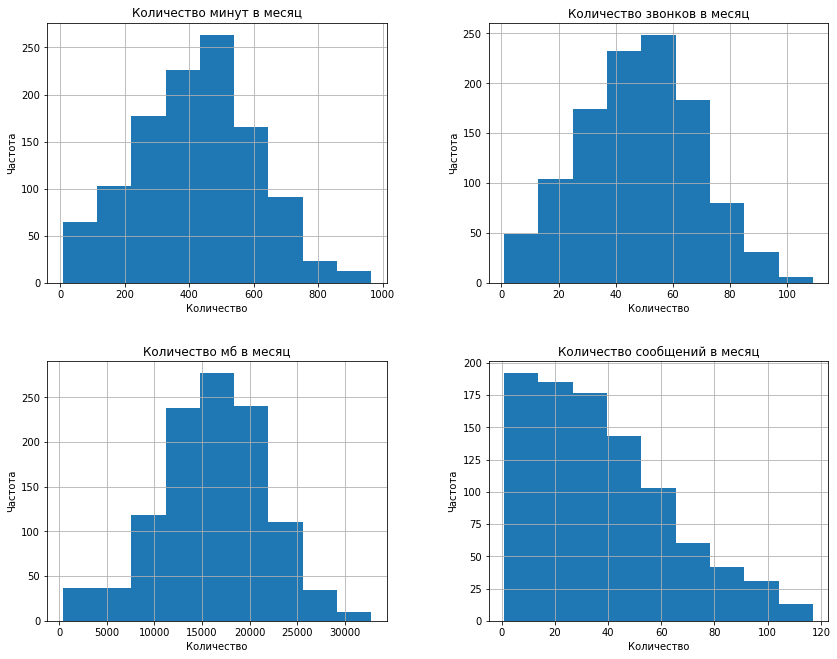

In [15]:
# Анализ количества минут
parameters_smart =[{'group': 'Sum_dur', 'title': 'Количество минут в месяц', 'xlabel': 'Количество', 'ylabel': 'Частота', 'loc_x': 0,'loc_y': 0}, 
    {'group': 'Count_dur', 'title':'Количество звонков в месяц', 'xlabel': 'Количество', 'ylabel': 'Частота','loc_x': 0,'loc_y': 1}, 
    {'group': 'mb_used', 'title': 'Количество мб в месяц', 'xlabel': 'Количество', 'ylabel': 'Частота','loc_x': 1,'loc_y': 0}, 
    {'group': 'messages', 'title': 'Количество сообщений в месяц', 'xlabel': 'Количество', 'ylabel': 'Частота','loc_x': 1,'loc_y': 1}]


print('Сводные данные после исключения выбросов:', '\n')
fig, axes = plt.subplots(2,2,figsize=(14,11))
for param in parameters_smart:
    mean_smart = tariff_smart[param['group']].mean() # среднее по месяцам
    variance_smart = np.var(tariff_smart[param['group']], ddof=1) # дисперсия
    standart_dev_smart = np.sqrt(variance_smart) # стандартное отклонение
    # Применим правило 3 сигм, для поиска выбросов 
    avg_smart = mean_smart + 3 * standart_dev_smart #  все, что выше является выбросом
    # Исключаем выбросы и значения равные 0, так как они не интересны для анализа выручки
    tariff_smart_filtr = tariff_smart[(tariff_smart[param['group']] < avg_smart) & tariff_smart[param['group']] !=0]
    # Строим гистограмму 
    tariff_smart_filtr.hist([param['group']], bins=9, ax=axes[param['loc_x'], param['loc_y']])
    axes[param['loc_x'], param['loc_y']].set_title(param['title'])
    axes[param['loc_x'], param['loc_y']].set_xlabel(param['xlabel'])
    axes[param['loc_x'], param['loc_y']].set_ylabel(param['ylabel'])
    # Выведем сводную информацию для каждой из услуг
    print(param['title'])
    print('Среднее {:.2f}'.format(tariff_smart_filtr[param['group']].mean()))
    print('Медиана', tariff_smart_filtr[param['group']].median())
    print('Дисперсия {:.2f}'.format(np.var(tariff_smart_filtr[param['group']], ddof=1)))
    print('Стандартное отклонение {:.2f}'.format(np.std(tariff_smart_filtr[param['group']])))
    print('Количество тех, кто не пользуется пакетом', tariff_smart[tariff_smart[param['group']] ==0][param['group']].count(), '\n')
    

1. Графики о количестве звонков и минут повторяют динамику друг друга
2. Судя по медиане и графику "Количество минут" набор данных скошен *влево* 
3. Набор данных для "Количество звонков" смещен вправо совсем незначительно *(почти симметричен!)*
4. Набоы данных для "Количество мб" скошен *влево*
5. Набоы данных для "Количество сообщений" скошен *вправо*
6. Заметная часть пользователей вообще не пользуются СМС (307)
7. Важно отметить, что в среднем в месяц значительная часть пользователей тратят больше половины от пакета минут (свыше 500), также есть превышение в пакете СМС (более 50шт). А также *больше половины* пользователей тратят свяше 15Гб(=15360мб) интернет трафика, входящего в пакет услуг. 

**Можно сделать вывод, что доход с тарифа Смарт идет не только с Ежемесячной платы (=550р), но и зачастую с доплаты за превышение всех пакетов услуг**

#### Сравнение тарифов по месяцам

Среднее количество минут по месяцам : "Смарт"- 386.76, "Ультра" - 495.93
Среднее количество звонков по месяцам : "Смарт"- 43.34, "Ультра" - 55.70
Среднее количество мб по месяцам : "Смарт"- 15077.69, "Ультра" - 18222.78
Среднее количество сообщений по месяцам : "Смарт"- 31.41, "Ультра" - 43.71


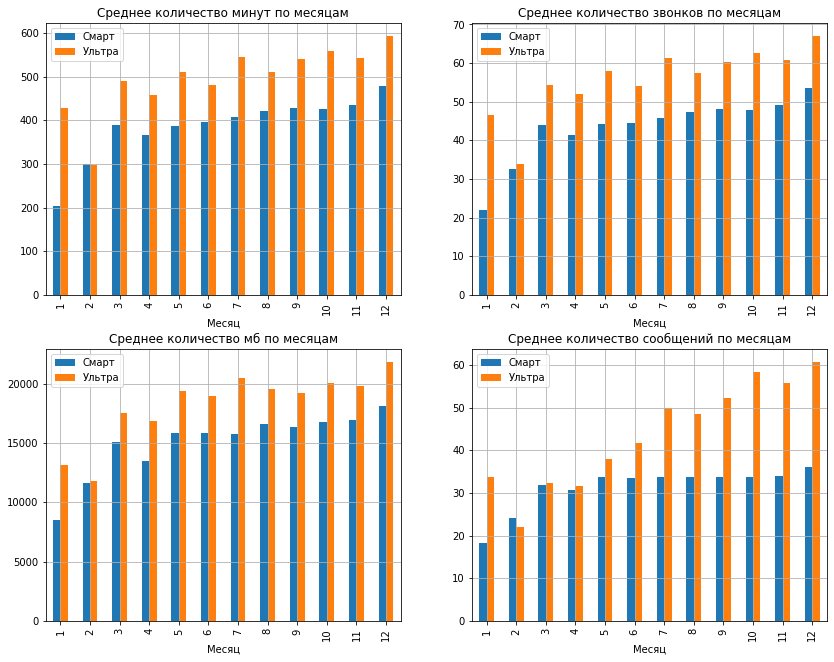

In [16]:
parameters =[{'group': 'Sum_dur', 'title': 'Среднее количество минут по месяцам', 'loc_x': 0,'loc_y': 0}, 
    {'group': 'Count_dur', 'title':'Среднее количество звонков по месяцам', 'loc_x': 0,'loc_y': 1}, 
    {'group': 'mb_used', 'title': 'Среднее количество мб по месяцам', 'loc_x': 1,'loc_y': 0}, 
    {'group': 'messages', 'title': 'Среднее количество сообщений по месяцам', 'loc_x': 1,'loc_y': 1}]
    
fig, axes = plt.subplots(2,2,figsize=(14,11))

# Выводим графики потраченных пакетов по месяцам 
for param in parameters:
    ultra = (tariff_ultra
                .pivot_table(index=[tariff_ultra.index.get_level_values('month')], values=param['group']))
    smart = (tariff_smart
                .pivot_table(index=[tariff_smart.index.get_level_values('month')], values=param['group']))
    all_tariffs = smart.merge(ultra, on='month')
    all_tariffs.columns = ['Смарт', 'Ультра']
    all_tariffs.plot(kind='bar', grid=True, ax=axes[param['loc_x'], param['loc_y']])
    axes[param['loc_x'], param['loc_y']].set_title(param['title'])
    axes[param['loc_x'], param['loc_y']].set_xlabel('Месяц')
    print(param['title'],': "Смарт"- {:.2f},'.format(all_tariffs['Смарт'].mean()), 
          '"Ультра" - {:.2f}'.format(all_tariffs['Ультра'].mean()))

**Сравнение трафика по тарифом наглядно показывает, что зачастую на тарифе Ультра тратят больше по всем направлениям услуг. Исключение составляет месяц февраль (и март-апрель для СМС) там трафик сравнивается или даже становится меньше тарифа Смарт.**
**Общая динамика превышения трафика на тарифе Ультра логична, так как там предоставляется больший пакет услуг.**

#### Сравнение выручки тарифов

In [17]:
# Посмотрим суммарную выручку по тарифам
print('Выручка суммарно за год:')
rev_ultra = tariff_ultra['revenue'].sum()
rev_smart = tariff_smart['revenue'].sum()
print('Смарт: ', rev_smart, '({:.2%})'.format(rev_smart/(rev_ultra + rev_smart)))
print('Ультра: ', rev_ultra, '({:.2%})'.format(rev_ultra/(rev_ultra + rev_smart)))

Выручка суммарно за год:
Смарт:  2651754.0300000003 (58.68%)
Ультра:  1867257.12 (41.32%)


Смарт приносит несколько больше. Несмотря на то, что тариф Ультра стоит дороже. Это может быть связано с разным количеством клиентов на каждом.

**Выведем сводные статистические данные по двум тарифам:**

In [18]:
# Данные по месяцам
tariffs_name = ['Смарт', 'Ультра']

# Смарт
mean_smart_rev = tariff_smart['revenue'].mean() # среднее по месяцам
var_smart_rev = np.var(tariff_smart['revenue'], ddof=1) # дисперсия
sdt_smart = np.sqrt(var_smart_rev) # стандартное отклонение
# Применим правило 3 сигм, для поиска выбросов 
avg_smart = mean_smart_rev + 3 * sdt_smart #  все, что выше является выбросом
# Исключаем выбросы
tariff_smart = tariff_smart[tariff_smart['revenue'] < avg_smart]

# Ультра
mean_ultra_rev = tariff_ultra['revenue'].mean() # среднее по месяцам
var_ultra_rev = np.var(tariff_ultra['revenue'], ddof=1) # дисперсия
sdt_ultra = np.sqrt(var_ultra_rev) # стандартное отклонение
# Применим правило 3 сигм, для поиска выбросов 
avg_ultra = mean_ultra_rev + 3 * sdt_ultra #  все, что выше является выбросом
# Исключаем выбросы
tariff_ultra = tariff_ultra[tariff_ultra['revenue'] < avg_ultra]
print('|Тариф      |', '   Cреднее|', '   Дисперсия|', ' Станд.отклонение|')
print('|{: <10}'.format(tariffs_name[0]), '|{: >11.2f}|'.format(mean_smart_rev), '{: >12.2f}|'.format(var_smart_rev), '{: >17.2f}|'.format(sdt_smart))
print('|{: <10}'.format(tariffs_name[1]), '|{: >11.2f}|'.format(mean_ultra_rev), '{: >12.2f}|'.format(var_ultra_rev), '{: >17.2f}|'.format(sdt_ultra))


|Тариф      |    Cреднее|    Дисперсия|  Станд.отклонение|
|Смарт      |    1189.66|    687593.22|            829.21|
|Ультра     |    1895.69|    356388.92|            596.98|


Обратим внимание, что тем не менее, у тарифа Ультра среднее выше, чем у Смарт. Но у второго она гараздо выше абонентской платы. На эту сводную информацию будем опираться далее. 

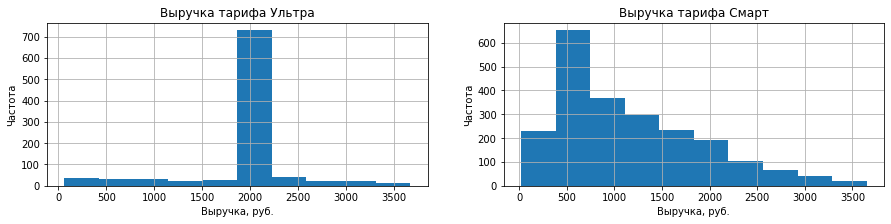

In [19]:
# Частота значений выручки
fig, axes =plt.subplots(1,2,figsize=(15,3))
tariff_ultra['revenue'].hist(ax=axes[0])
axes[0].set_title('Выручка тарифа Ультра')
axes[0].set_xlabel('Выручка, руб.')
axes[0].set_ylabel('Частота');

tariff_smart['revenue'].hist(ax=axes[1])
axes[1].set_title('Выручка тарифа Смарт')
axes[1].set_xlabel('Выручка, руб.')
axes[1].set_ylabel('Частота');

Частота значений также показывает ожидаемое распределение: 
 
**Тариф Ультра**: Чаще всего пользователи платят только за абонентскую плату, очень редко переплачивают. Значение ниже тарифного плана появляются из-за особенностей оплаты тех людей, кто подключается к тарифу не с начала месяца. 
 
**Тариф Смарт**: Достаточно часто пользователи переплачивают сверх тарифного плана. Значение ниже абонентской платы появилось по той же причине. Причем даже есть те, кто платят больше, чем на Ультра.


In [20]:
#  Посчитаем долю выручки за счет переплат
print('Сумма переплат')
smart_ttl = tariff_smart['revenue'].sum()
ultra_ttl = tariff_ultra['revenue'].sum()
smart_over = tariff_smart[tariff_smart['revenue']>550]['revenue'].sum()
ultra_over = tariff_ultra[tariff_ultra['revenue']>1950]['revenue'].sum()
print('Смарт: {:.2f}'.format(smart_over), '({:.2%})'.format(smart_over/smart_ttl))
print('Ультра: {:.2f}'.format(ultra_over), '({:.2%})'.format(ultra_over/ultra_ttl))

smart_over = tariff_smart[tariff_smart['revenue']>1950]['revenue'].sum()
print('Смарт > 1950р: {:.2f}'.format(smart_over), '({:.2%})'.format(smart_over/smart_ttl))

Сумма переплат
Смарт: 2312887.33 (90.80%)
Ультра: 318141.95 (17.52%)
Смарт > 1950р: 893041.62 (35.06%)


**Почти 90% выручки на тарифе Смарт приносят переплаты** сверх тарифного плана, причем это во много больше суммы переплат на Ультра. Также значилельную долю выручки (35%) на Смарт приносят переплаты свыше 1950р (абонентской платы на Ультра).

In [21]:
#  Среднее кол-во клиентов переплативших за месяц 
print('Среднее кол-во клиентов переплативших за месяц')
smart_over = tariff_smart[tariff_smart['revenue']>550]['revenue'].count()/12
ultra_over = tariff_ultra[tariff_ultra['revenue']>1950]['revenue'].count()/12
print('Смарт: {:.2f}'.format(smart_over), '({:.2%})'.format(smart_over/users_smart)) # И доля от общего кол-ва
print('Ультра: {:.2f}'.format(ultra_over), '({:.2%})'.format(ultra_over/users_ultra))# И доля от общего кол-ва

smart_over = tariff_smart[tariff_smart['revenue']>1950]['revenue'].count()/12
print('Смарт > 1950р: {:.2f}'.format(smart_over), '({:.2%})'.format(smart_over/users_smart))

Среднее кол-во клиентов переплативших за месяц
Смарт: 134.92 (38.44%)
Ультра: 10.08 (6.77%)
Смарт > 1950р: 30.00 (8.55%)


Получается, что 38% из 351 человек на тарифе Смарт готовы переплачивать. 

In [22]:
# Кол-во людей необходимых для Ультра, чтобы выручка сравнялась
print((smart_ttl - ultra_ttl)/ 1950/ 12)

31.256428205128213


Это почти равно среднему кол-ву людей переплачивающих более 1950р на Смарт. 

In [23]:
# Посчитаем сколько людей на Смарт хотя бы раз переплачивали более 1950р
users = len(tariff_smart.query('revenue > 1950').index.get_level_values('user_id').unique())
users

158

Достаточно много - 158 из 351!

**Если хотя бы 1/4 (около 39) пользователей Смарт (из тех кто хотя бы раз переплатил 1950р) перейдет на тариф Ультра, то это уже превысит выручку от этих же клиентов на тарифе Смарт:**

Напомним: "Смарт > 1950р: 893041.62"

In [24]:
users / 4 * 1950 * 12

924300.0

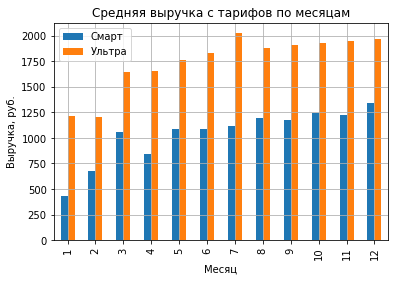

In [25]:
# Средняя выручка c тарифов по месяцам на графике
ultra_revenue = (tariff_ultra.pivot_table(index=[tariff_ultra.index.get_level_values('month')], values='revenue'))
smart_revenue = (tariff_smart.pivot_table(index=[tariff_smart.index.get_level_values('month')], values='revenue'))
revenue_tariffs = smart_revenue.merge(ultra_revenue, on='month')
revenue_tariffs.columns = ['Смарт', 'Ультра']
revenue_tariffs.plot(kind='bar', grid=True)
plt.title('Средняя выручка c тарифов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка, руб.');

Среднее по тарифу Ультра всегда выше Смарт. Но в целом динамика похожая от месяца к месяцу.

**Пока все вышеперечисленное, говорит о преимуществах тарифа Ультра. Но нам стоит убедиться, что как минимум среднее у тарифных планов точно отличается.**

### Шаг 4. Проверка гипотез <a id="some_id"></a>

#### Гипотеза №1

Исходя из описания тарифов и различия в потребляемом трафике (проведенном выше) хотим посмотреть, как отличается денежный поток по каждому тарифу. 
 
Выдвигаем гипотезу, что **Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны**  - это будет нулевая гипотеза H₀ (так как H₀ всегда формулируется так, чтобы использовать знак равенства). 
 
Противоположная ей, альтернативная гипотеза H1 - это **Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается (не равны)**

In [26]:
# Зададим критический уровень статистической значимости
alpha = 0.05 

# Тест Левена проверяет нулевую гипотезу о том, что все входные выборки взяты с равными дисперсиями.
# если они отличаются меньше, чем на 5%, equal_var=True.
stats, p = levene(tariff_ultra['revenue'], tariff_smart['revenue'])
if  p < alpha:
    print("Дисперсии генеральных совокупностей равны")
else:
    print("Дисперсии генеральных совокупностей не равны")

print()
# Проверяем гипотезу о равенстве средних двух генеральных совокупностей. Гипотеза двусторонняя 
result_1 = st.ttest_ind(tariff_smart['revenue'], tariff_ultra['revenue'], equal_var=False) 
print('p-значение: ', result_1.pvalue)

# если p-value окажется меньше alpha - отвергнем гипотезу
if (result_1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Дисперсии генеральных совокупностей равны

p-значение:  3.698027828959924e-168
Отвергаем нулевую гипотезу


Полученное значение p-value слишком маленькое, чтобы говорить о том, что хотя выручка может быть одинакова, а данное значение получилось случайно. Наблюдается значимое различие.
Отвергаем нулевую гипотезу в пользу альтернативной - **Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

#### Гипотеза №2

Выдвигаем гипотезу, что **Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов**  - это будет нулевая гипотеза H₀.

Противоположная ей, альтернативная гипотеза H1 - это **Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

In [27]:
Moscow = traffic[traffic['city'] == 'Москва']
all_city = traffic[traffic['city'] != 'Москва']

# Тест Левена проверяет нулевую гипотезу о том, что все входные выборки взяты с равными дисперсиями.
# если они отличаются меньше, чем на 5%, equal_var=True.
stats, p = levene(Moscow['revenue'], all_city['revenue'])
if  p < alpha:
    print("Дисперсии генеральных совокупностей равны")
else:
    print("Дисперсии генеральных совокупностей не равны")

print()
# Проверяем гипотезу о равенстве средних двух генеральных совокупностей. Гипотеза двусторонняя 
result_2 = st.ttest_ind(Moscow['revenue'], all_city['revenue'], equal_var=False) 
print('p-значение: ', result_2.pvalue)

# если p-value окажется меньше alpha - отвергнем гипотезу
if (result_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


Дисперсии генеральных совокупностей не равны

p-значение:  0.4585208414555799
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка для двух тарифов одинакова, с вероятностью в почти 46% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о полноценном равенстве.

### Шаг 5. Общий вывод <a id="some_id"></a>

* Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
* Средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов (но вероятно случайное появление такого события)
* Несмотря на явное превалирование количества клиентов на тарифе Смарт (351 против 149), выручка по нему занимает всего 58.38% от общей.
* Чаще всего на тарифе Смарт (в 38.44% случаев) платят выше абонентской платы (> 550р).
* 158 клиентов Смарт хотя бы раз платили выше 1950 (чем абонентская плата тарифа Ультра).
* При этом зачастую на Ультра не тратят и половины пакетов услуг.

Отсюда, следует предположение, что если мы переведем хотя бы 39 человек (из 158 переплачивающих) на тариф Ультра, то общая выручка вырастет. При этом каналы потребления трафиков будут в среднем более разгруженны. 
**Более выгодный тариф Ультра.**